In [6]:
import pyspark as sp

# Initialize SparkContext
sc = sp.SparkContext.getOrCreate()
print(sc)
print(sc.version)

# Import SparkSession from pyspark.sql
from pyspark.sql import SparkSession

# Create SparkSession
spark = SparkSession.builder.getOrCreate()
print(spark)

import pandas as pd
import numpy as np

# Create a Pandas DataFrame
pd_temp = pd.DataFrame(np.random.random(10))

# Create a Spark DataFrame from the Pandas DataFrame
spark_temp = spark.createDataFrame(pd_temp)

# Examine the tables in the catalog (will be empty because no table is registered yet)
print(spark.catalog.listTables())

# Add spark_temp to the catalog by registering it as a temporary view
spark_temp.createOrReplaceTempView("temp")

# Examine the tables in the catalog again (should show the "temp" table)
print(spark.catalog.listTables())


<SparkContext master=local[*] appName=BigDataAnalyticsProject>
3.5.0
[Table(name='temp', catalog=None, namespace=[], description=None, tableType='TEMPORARY', isTemporary=True)]
[Table(name='temp', catalog=None, namespace=[], description=None, tableType='TEMPORARY', isTemporary=True)]


In [9]:
file_path = r'C:\Users\suyog\Downloads\bigdata\airports.csv'

#Read in the airports path
airports = spark.read.csv(file_path, header=True)

airports.show()

+---+--------------------+----------------+-----------------+----+---+---+
|faa|                name|             lat|              lon| alt| tz|dst|
+---+--------------------+----------------+-----------------+----+---+---+
|04G|   Lansdowne Airport|      41.1304722|      -80.6195833|1044| -5|  A|
|06A|Moton Field Munic...|      32.4605722|      -85.6800278| 264| -5|  A|
|06C| Schaumburg Regional|      41.9893408|      -88.1012428| 801| -6|  A|
|06N|     Randall Airport|       41.431912|      -74.3915611| 523| -5|  A|
|09J|Jekyll Island Air...|      31.0744722|      -81.4277778|  11| -4|  A|
|0A9|Elizabethton Muni...|      36.3712222|      -82.1734167|1593| -4|  A|
|0G6|Williams County A...|      41.4673056|      -84.5067778| 730| -5|  A|
|0G7|Finger Lakes Regi...|      42.8835647|      -76.7812318| 492| -5|  A|
|0P2|Shoestring Aviati...|      39.7948244|      -76.6471914|1000| -5|  U|
|0S9|Jefferson County ...|      48.0538086|     -122.8106436| 108| -8|  A|
|0W3|Harford County Ai...

In [10]:
type(airports)

pyspark.sql.dataframe.DataFrame

In [11]:
spark.catalog.listDatabases()

[Database(name='default', catalog='spark_catalog', description='default database', locationUri='file:/C:/Users/suyog/AppData/Local/Programs/Microsoft%2520VS%2520Code/spark-warehouse')]

In [12]:
spark.catalog.listTables()

[Table(name='temp', catalog=None, namespace=[], description=None, tableType='TEMPORARY', isTemporary=True)]

In [13]:
flights = spark.read.csv(r'C:\Users\suyog\Downloads\bigdata\flights_small.csv', header=True)
flights.show()

+----+-----+---+--------+---------+--------+---------+-------+-------+------+------+----+--------+--------+----+------+
|year|month|day|dep_time|dep_delay|arr_time|arr_delay|carrier|tailnum|flight|origin|dest|air_time|distance|hour|minute|
+----+-----+---+--------+---------+--------+---------+-------+-------+------+------+----+--------+--------+----+------+
|2014|   12|  8|     658|       -7|     935|       -5|     VX| N846VA|  1780|   SEA| LAX|     132|     954|   6|    58|
|2014|    1| 22|    1040|        5|    1505|        5|     AS| N559AS|   851|   SEA| HNL|     360|    2677|  10|    40|
|2014|    3|  9|    1443|       -2|    1652|        2|     VX| N847VA|   755|   SEA| SFO|     111|     679|  14|    43|
|2014|    4|  9|    1705|       45|    1839|       34|     WN| N360SW|   344|   PDX| SJC|      83|     569|  17|     5|
|2014|    3|  9|     754|       -1|    1015|        1|     AS| N612AS|   522|   SEA| BUR|     127|     937|   7|    54|
|2014|    1| 15|    1037|        7|    1

In [14]:
flights.name = flights.createOrReplaceTempView('flights')
spark.catalog.listTables()

[Table(name='flights', catalog=None, namespace=[], description=None, tableType='TEMPORARY', isTemporary=True),
 Table(name='temp', catalog=None, namespace=[], description=None, tableType='TEMPORARY', isTemporary=True)]

In [15]:
# Create the DataFrame flights
flights_df = spark.table('flights')
print(flights_df.show())

+----+-----+---+--------+---------+--------+---------+-------+-------+------+------+----+--------+--------+----+------+
|year|month|day|dep_time|dep_delay|arr_time|arr_delay|carrier|tailnum|flight|origin|dest|air_time|distance|hour|minute|
+----+-----+---+--------+---------+--------+---------+-------+-------+------+------+----+--------+--------+----+------+
|2014|   12|  8|     658|       -7|     935|       -5|     VX| N846VA|  1780|   SEA| LAX|     132|     954|   6|    58|
|2014|    1| 22|    1040|        5|    1505|        5|     AS| N559AS|   851|   SEA| HNL|     360|    2677|  10|    40|
|2014|    3|  9|    1443|       -2|    1652|        2|     VX| N847VA|   755|   SEA| SFO|     111|     679|  14|    43|
|2014|    4|  9|    1705|       45|    1839|       34|     WN| N360SW|   344|   PDX| SJC|      83|     569|  17|     5|
|2014|    3|  9|     754|       -1|    1015|        1|     AS| N612AS|   522|   SEA| BUR|     127|     937|   7|    54|
|2014|    1| 15|    1037|        7|    1

In [16]:
#include a new column called duration_hrs
flights = flights.withColumn('duration_hrs', flights.air_time / 60)
flights.show()

+----+-----+---+--------+---------+--------+---------+-------+-------+------+------+----+--------+--------+----+------+------------------+
|year|month|day|dep_time|dep_delay|arr_time|arr_delay|carrier|tailnum|flight|origin|dest|air_time|distance|hour|minute|      duration_hrs|
+----+-----+---+--------+---------+--------+---------+-------+-------+------+------+----+--------+--------+----+------+------------------+
|2014|   12|  8|     658|       -7|     935|       -5|     VX| N846VA|  1780|   SEA| LAX|     132|     954|   6|    58|               2.2|
|2014|    1| 22|    1040|        5|    1505|        5|     AS| N559AS|   851|   SEA| HNL|     360|    2677|  10|    40|               6.0|
|2014|    3|  9|    1443|       -2|    1652|        2|     VX| N847VA|   755|   SEA| SFO|     111|     679|  14|    43|              1.85|
|2014|    4|  9|    1705|       45|    1839|       34|     WN| N360SW|   344|   PDX| SJC|      83|     569|  17|     5|1.3833333333333333|
|2014|    3|  9|     754|  

In [17]:
flights.describe().show()

+-------+------+------------------+-----------------+------------------+------------------+------------------+------------------+-------+-------+-----------------+------+-----+------------------+-----------------+------------------+-----------------+------------------+
|summary|  year|             month|              day|          dep_time|         dep_delay|          arr_time|         arr_delay|carrier|tailnum|           flight|origin| dest|          air_time|         distance|              hour|           minute|      duration_hrs|
+-------+------+------------------+-----------------+------------------+------------------+------------------+------------------+-------+-------+-----------------+------+-----+------------------+-----------------+------------------+-----------------+------------------+
|  count| 10000|             10000|            10000|             10000|             10000|             10000|             10000|  10000|  10000|            10000| 10000|10000|             1

In [18]:
# Filter flights with a SQL string
long_flights1 = flights.filter('distance > 1000')
long_flights1.show()

+----+-----+---+--------+---------+--------+---------+-------+-------+------+------+----+--------+--------+----+------+------------------+
|year|month|day|dep_time|dep_delay|arr_time|arr_delay|carrier|tailnum|flight|origin|dest|air_time|distance|hour|minute|      duration_hrs|
+----+-----+---+--------+---------+--------+---------+-------+-------+------+------+----+--------+--------+----+------+------------------+
|2014|    1| 22|    1040|        5|    1505|        5|     AS| N559AS|   851|   SEA| HNL|     360|    2677|  10|    40|               6.0|
|2014|    4| 19|    1236|       -4|    1508|       -7|     AS| N309AS|   490|   SEA| SAN|     135|    1050|  12|    36|              2.25|
|2014|   11| 19|    1812|       -3|    2352|       -4|     AS| N564AS|    26|   SEA| ORD|     198|    1721|  18|    12|               3.3|
|2014|    8|  3|    1120|        0|    1415|        2|     AS| N305AS|   656|   SEA| PHX|     154|    1107|  11|    20| 2.566666666666667|
|2014|   11| 12|    2346|  

In [19]:
# Filter flights with a boolean column
long_flights2 = flights.filter(flights.distance > 1000 )
long_flights2.show()

+----+-----+---+--------+---------+--------+---------+-------+-------+------+------+----+--------+--------+----+------+------------------+
|year|month|day|dep_time|dep_delay|arr_time|arr_delay|carrier|tailnum|flight|origin|dest|air_time|distance|hour|minute|      duration_hrs|
+----+-----+---+--------+---------+--------+---------+-------+-------+------+------+----+--------+--------+----+------+------------------+
|2014|    1| 22|    1040|        5|    1505|        5|     AS| N559AS|   851|   SEA| HNL|     360|    2677|  10|    40|               6.0|
|2014|    4| 19|    1236|       -4|    1508|       -7|     AS| N309AS|   490|   SEA| SAN|     135|    1050|  12|    36|              2.25|
|2014|   11| 19|    1812|       -3|    2352|       -4|     AS| N564AS|    26|   SEA| ORD|     198|    1721|  18|    12|               3.3|
|2014|    8|  3|    1120|        0|    1415|        2|     AS| N305AS|   656|   SEA| PHX|     154|    1107|  11|    20| 2.566666666666667|
|2014|   11| 12|    2346|  

In [20]:
# Select the first set of columns as a string
selected_1 = flights.select('tailnum', 'origin', 'dest')

In [21]:
# Select the second set of columns usinf df.col_name
temp = flights.select(flights.origin, flights.dest, flights.carrier)

In [22]:
# Define first filter to only keep flights from SEA to PDX.
FilterA = flights.origin == 'SEA'
FilterB =flights.dest == 'PDX'

In [23]:
# Filter the data, first by filterA then by filterB
selected_2 = temp.filter(FilterA).filter(FilterB)
selected_2.show()

+------+----+-------+
|origin|dest|carrier|
+------+----+-------+
|   SEA| PDX|     OO|
|   SEA| PDX|     OO|
|   SEA| PDX|     OO|
|   SEA| PDX|     OO|
|   SEA| PDX|     OO|
|   SEA| PDX|     AS|
|   SEA| PDX|     OO|
|   SEA| PDX|     OO|
|   SEA| PDX|     OO|
|   SEA| PDX|     OO|
|   SEA| PDX|     OO|
|   SEA| PDX|     OO|
|   SEA| PDX|     OO|
|   SEA| PDX|     OO|
|   SEA| PDX|     AS|
|   SEA| PDX|     OO|
|   SEA| PDX|     OO|
|   SEA| PDX|     OO|
|   SEA| PDX|     OO|
|   SEA| PDX|     OO|
+------+----+-------+
only showing top 20 rows



In [24]:
#Create a table of the average speed of each flight both ways.
#Calculate average speed by dividing the distance by the air_time (converted to hours).Use the .alias() method name
# Define avg_speed
avg_speed = (flights.distance/(flights.air_time/60)).alias("avg_speed")
speed_1 = flights.select('origin','dest','tailnum', avg_speed)

In [25]:
#Using the Spark DataFrame method .selectExpr() 
speed_2 =flights.selectExpr('origin','dest','tailnum','distance/(air_time/60) as avg_speed')
speed_2.show()

+------+----+-------+------------------+
|origin|dest|tailnum|         avg_speed|
+------+----+-------+------------------+
|   SEA| LAX| N846VA| 433.6363636363636|
|   SEA| HNL| N559AS| 446.1666666666667|
|   SEA| SFO| N847VA|367.02702702702703|
|   PDX| SJC| N360SW| 411.3253012048193|
|   SEA| BUR| N612AS| 442.6771653543307|
|   PDX| DEN| N646SW|491.40495867768595|
|   PDX| OAK| N422WN|             362.0|
|   SEA| SFO| N361VA| 415.7142857142857|
|   SEA| SAN| N309AS| 466.6666666666667|
|   SEA| ORD| N564AS| 521.5151515151515|
|   SEA| LAX| N323AS| 440.3076923076923|
|   SEA| PHX| N305AS|431.29870129870125|
|   SEA| LAS| N433AS| 409.6062992125984|
|   SEA| ANC| N765AS|474.75409836065575|
|   SEA| SFO| N713AS| 315.8139534883721|
|   PDX| SFO| N27205| 366.6666666666667|
|   SEA| SMF| N626AS|477.63157894736844|
|   SEA| MDW| N8634A|481.38888888888886|
|   SEA| BOS| N597AS| 516.4137931034483|
|   PDX| BUR| N215AG| 441.6216216216216|
+------+----+-------+------------------+
only showing top

In [26]:
flights.describe()

DataFrame[summary: string, year: string, month: string, day: string, dep_time: string, dep_delay: string, arr_time: string, arr_delay: string, carrier: string, tailnum: string, flight: string, origin: string, dest: string, air_time: string, distance: string, hour: string, minute: string, duration_hrs: string]

In [27]:
#arr_time: string and distance: string, so to find min() and max() we need to convert this float 
flights = flights.withColumn('distance', flights.distance.cast('float'))
flights = flights.withColumn('air_time', flights.air_time.cast('float'))

flights.describe('air_time', 'distance').show()

+-------+------------------+-----------------+
|summary|          air_time|         distance|
+-------+------------------+-----------------+
|  count|              9925|            10000|
|   mean|152.88423173803525|        1208.1516|
| stddev|  72.8656286392139|656.8599023464376|
|    min|              20.0|             93.0|
|    max|             409.0|           2724.0|
+-------+------------------+-----------------+



In [28]:
#Find the length of the shortest (in terms of distance) flight that left PDX 
flights.filter(flights.origin =='PDX').groupBy().min('distance').show()

+-------------+
|min(distance)|
+-------------+
|        106.0|
+-------------+



In [29]:
#Find the length of the longest (in terms of time) flight that left SEA
flights.filter(flights.origin == 'SEA').groupBy().max('air_time').show()

+-------------+
|max(air_time)|
+-------------+
|        409.0|
+-------------+



In [30]:
#get the average air time of Delta Airlines flights  that left SEA. 
flights.filter(flights.carrier == 'DL').filter(flights.origin == 'SEA').groupBy().avg('air_time').show()

+------------------+
|     avg(air_time)|
+------------------+
|188.20689655172413|
+------------------+



In [31]:
#get the total number of hours all planes in this dataset spent in the air by creating a column called duration_hrs
flights.withColumn('duration_hrs', flights.air_time/60).groupBy().sum('duration_hrs').show()

+------------------+
| sum(duration_hrs)|
+------------------+
|25289.600000000126|
+------------------+



In [32]:
#Group by tailnum column
by_plane = flights.groupBy('tailnum')

In [33]:
#Use the .count() method with no arguments to count the number of flights each plane made
by_plane.count().show()

+-------+-----+
|tailnum|count|
+-------+-----+
| N442AS|   38|
| N102UW|    2|
| N36472|    4|
| N38451|    4|
| N73283|    4|
| N513UA|    2|
| N954WN|    5|
| N388DA|    3|
| N567AA|    1|
| N516UA|    2|
| N927DN|    1|
| N8322X|    1|
| N466SW|    1|
|  N6700|    1|
| N607AS|   45|
| N622SW|    4|
| N584AS|   31|
| N914WN|    4|
| N654AW|    2|
| N336NW|    1|
+-------+-----+
only showing top 20 rows



In [34]:
#group by origin column
by_origin = flights.groupBy('origin')

In [35]:
#Find the .avg() of the air_time column to find average duration of flights from PDX and SEA
by_origin.avg('air_time').show()

+------+------------------+
|origin|     avg(air_time)|
+------+------------------+
|   SEA| 160.4361496051259|
|   PDX|137.11543248288737|
+------+------------------+



In [36]:
# Import pyspark.sql.functions as F
import pyspark.sql.functions as F

#convert to dep_delay to numeric column
flights = flights.withColumn('dep_delay', flights.dep_delay.cast('float'))

# Group by month and dest
by_month_dest = flights.groupBy('month', 'dest')

In [37]:
# Average departure delay by month and destination
by_month_dest.avg('dep_delay').show()

+-----+----+--------------------+
|month|dest|      avg(dep_delay)|
+-----+----+--------------------+
|   11| TUS| -2.3333333333333335|
|   11| ANC|   7.529411764705882|
|    1| BUR|               -1.45|
|    1| PDX| -5.6923076923076925|
|    6| SBA|                -2.5|
|    5| LAX|-0.15789473684210525|
|   10| DTW|                 2.6|
|    6| SIT|                -1.0|
|   10| DFW|  18.176470588235293|
|    3| FAI|                -2.2|
|   10| SEA|                -0.8|
|    2| TUS| -0.6666666666666666|
|   12| OGG|  25.181818181818183|
|    9| DFW|   4.066666666666666|
|    5| EWR|               14.25|
|    3| RDM|                -6.2|
|    8| DCA|                 2.6|
|    7| ATL|   4.675675675675675|
|    4| JFK| 0.07142857142857142|
|   10| SNA| -1.1333333333333333|
+-----+----+--------------------+
only showing top 20 rows



In [38]:
airports.show()

+---+--------------------+----------------+-----------------+----+---+---+
|faa|                name|             lat|              lon| alt| tz|dst|
+---+--------------------+----------------+-----------------+----+---+---+
|04G|   Lansdowne Airport|      41.1304722|      -80.6195833|1044| -5|  A|
|06A|Moton Field Munic...|      32.4605722|      -85.6800278| 264| -5|  A|
|06C| Schaumburg Regional|      41.9893408|      -88.1012428| 801| -6|  A|
|06N|     Randall Airport|       41.431912|      -74.3915611| 523| -5|  A|
|09J|Jekyll Island Air...|      31.0744722|      -81.4277778|  11| -4|  A|
|0A9|Elizabethton Muni...|      36.3712222|      -82.1734167|1593| -4|  A|
|0G6|Williams County A...|      41.4673056|      -84.5067778| 730| -5|  A|
|0G7|Finger Lakes Regi...|      42.8835647|      -76.7812318| 492| -5|  A|
|0P2|Shoestring Aviati...|      39.7948244|      -76.6471914|1000| -5|  U|
|0S9|Jefferson County ...|      48.0538086|     -122.8106436| 108| -8|  A|
|0W3|Harford County Ai...

In [39]:
# Rename the faa column
airports = airports.withColumnRenamed('faa','dest')

In [40]:
# Join the DataFrames
flights_with_airports= flights.join(airports, on='dest', how='leftouter')
flights_with_airports.show()

+----+----+-----+---+--------+---------+--------+---------+-------+-------+------+------+--------+--------+----+------+------------------+--------------------+---------+-----------+----+---+---+
|dest|year|month|day|dep_time|dep_delay|arr_time|arr_delay|carrier|tailnum|flight|origin|air_time|distance|hour|minute|      duration_hrs|                name|      lat|        lon| alt| tz|dst|
+----+----+-----+---+--------+---------+--------+---------+-------+-------+------+------+--------+--------+----+------+------------------+--------------------+---------+-----------+----+---+---+
| LAX|2014|   12|  8|     658|     -7.0|     935|       -5|     VX| N846VA|  1780|   SEA|   132.0|   954.0|   6|    58|               2.2|    Los Angeles Intl|33.942536|-118.408075| 126| -8|  A|
| HNL|2014|    1| 22|    1040|      5.0|    1505|        5|     AS| N559AS|   851|   SEA|   360.0|  2677.0|  10|    40|               6.0|       Honolulu Intl|21.318681|-157.922428|  13|-10|  N|
| SFO|2014|    3|  9|    

In [41]:
planes = spark.read.csv(r'C:\Users\suyog\Downloads\bigdata\planes.csv', header=True)
planes.show()

+-------+----+--------------------+----------------+--------+-------+-----+-----+---------+
|tailnum|year|                type|    manufacturer|   model|engines|seats|speed|   engine|
+-------+----+--------------------+----------------+--------+-------+-----+-----+---------+
| N102UW|1998|Fixed wing multi ...|AIRBUS INDUSTRIE|A320-214|      2|  182|   NA|Turbo-fan|
| N103US|1999|Fixed wing multi ...|AIRBUS INDUSTRIE|A320-214|      2|  182|   NA|Turbo-fan|
| N104UW|1999|Fixed wing multi ...|AIRBUS INDUSTRIE|A320-214|      2|  182|   NA|Turbo-fan|
| N105UW|1999|Fixed wing multi ...|AIRBUS INDUSTRIE|A320-214|      2|  182|   NA|Turbo-fan|
| N107US|1999|Fixed wing multi ...|AIRBUS INDUSTRIE|A320-214|      2|  182|   NA|Turbo-fan|
| N108UW|1999|Fixed wing multi ...|AIRBUS INDUSTRIE|A320-214|      2|  182|   NA|Turbo-fan|
| N109UW|1999|Fixed wing multi ...|AIRBUS INDUSTRIE|A320-214|      2|  182|   NA|Turbo-fan|
| N110UW|1999|Fixed wing multi ...|AIRBUS INDUSTRIE|A320-214|      2|  182|   NA

In [42]:
# Rename year column on panes to avoid duplicate column name
planes = planes.withColumnRenamed('year', 'plane_year')

In [43]:
#join the flights and plane table use key as tailnum column
model_data = flights.join(planes, on='tailnum', how='leftouter')
model_data.show()

+-------+----+-----+---+--------+---------+--------+---------+-------+------+------+----+--------+--------+----+------+------------------+----------+--------------------+--------------+-----------+-------+-----+-----+---------+
|tailnum|year|month|day|dep_time|dep_delay|arr_time|arr_delay|carrier|flight|origin|dest|air_time|distance|hour|minute|      duration_hrs|plane_year|                type|  manufacturer|      model|engines|seats|speed|   engine|
+-------+----+-----+---+--------+---------+--------+---------+-------+------+------+----+--------+--------+----+------+------------------+----------+--------------------+--------------+-----------+-------+-----+-----+---------+
| N846VA|2014|   12|  8|     658|     -7.0|     935|       -5|     VX|  1780|   SEA| LAX|   132.0|   954.0|   6|    58|               2.2|      2011|Fixed wing multi ...|        AIRBUS|   A320-214|      2|  182|   NA|Turbo-fan|
| N559AS|2014|    1| 22|    1040|      5.0|    1505|        5|     AS|   851|   SEA| HNL

In [44]:
model_data.describe()

DataFrame[summary: string, tailnum: string, year: string, month: string, day: string, dep_time: string, dep_delay: string, arr_time: string, arr_delay: string, carrier: string, flight: string, origin: string, dest: string, air_time: string, distance: string, hour: string, minute: string, duration_hrs: string, plane_year: string, type: string, manufacturer: string, model: string, engines: string, seats: string, speed: string, engine: string]

In [45]:
model_data = model_data.withColumn('arr_delay', model_data.arr_delay.cast('integer'))
model_data = model_data.withColumn('air_time' , model_data.air_time.cast('integer'))
model_data = model_data.withColumn('month', model_data.month.cast('integer'))
model_data = model_data.withColumn('plane_year', model_data.plane_year.cast('integer'))

In [46]:
model_data.describe('arr_delay', 'air_time','month', 'plane_year').show()

+-------+------------------+------------------+------------------+-----------------+
|summary|         arr_delay|          air_time|             month|       plane_year|
+-------+------------------+------------------+------------------+-----------------+
|  count|              9925|              9925|             10000|             9354|
|   mean|2.2530982367758186|152.88423173803525|            6.6438|2001.594398118452|
| stddev|31.074918600451877|  72.8656286392139|3.3191600205962097|58.92921992728455|
|    min|               -58|                20|                 1|                0|
|    max|               900|               409|                12|             2014|
+-------+------------------+------------------+------------------+-----------------+



In [47]:
# Create a new column
model_data =model_data.withColumn('plane_age', model_data.year - model_data.plane_year)

In [48]:
model_data = model_data.withColumn('is_late', model_data.arr_delay >0)

model_data = model_data.withColumn('label', model_data.is_late.cast('integer'))

model_data.filter("arr_delay is not NULL and dep_delay is not NULL and air_time is not NULL and plane_year is not NULL")

DataFrame[tailnum: string, year: string, month: int, day: string, dep_time: string, dep_delay: float, arr_time: string, arr_delay: int, carrier: string, flight: string, origin: string, dest: string, air_time: int, distance: float, hour: string, minute: string, duration_hrs: double, plane_year: int, type: string, manufacturer: string, model: string, engines: string, seats: string, speed: string, engine: string, plane_age: double, is_late: boolean, label: int]

In [49]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder

In [50]:
#Create a StringIndexer
carr_indexer = StringIndexer(inputCol='carrier', outputCol='carrier_index')
#Create a OneHotEncoder
carr_encoder = OneHotEncoder(inputCol='carrier_index', outputCol='carr_fact')

In [51]:
# encode the dest column just like you did above
dest_indexer = StringIndexer(inputCol='dest', outputCol='dest_index')
dest_encoder = OneHotEncoder(inputCol='dest_index', outputCol='dest_fact')

In [52]:
# Assemble a  Vector
from pyspark.ml.feature import  VectorAssembler

In [53]:
vec_assembler =VectorAssembler(inputCols=['month', 'air_time','carr_fact','dest_fact','plane_age'],
                              outputCol='features',handleInvalid="skip")

In [54]:
# #### Create the pipeline
# You're finally ready to create a` Pipeline!` Pipeline is a class in the `pyspark.ml module` that combines all the Estimators and Transformers that you've already created.

from pyspark.ml import Pipeline

flights_pipe = Pipeline(stages=[dest_indexer, dest_encoder, carr_indexer, carr_encoder, vec_assembler])

In [55]:
piped_data =flights_pipe.fit(model_data).transform(model_data)

In [56]:
piped_data.show()

+-------+----+-----+---+--------+---------+--------+---------+-------+------+------+----+--------+--------+----+------+------------------+----------+--------------------+--------------+-----------+-------+-----+-----+---------+---------+-------+-----+----------+---------------+-------------+--------------+--------------------+
|tailnum|year|month|day|dep_time|dep_delay|arr_time|arr_delay|carrier|flight|origin|dest|air_time|distance|hour|minute|      duration_hrs|plane_year|                type|  manufacturer|      model|engines|seats|speed|   engine|plane_age|is_late|label|dest_index|      dest_fact|carrier_index|     carr_fact|            features|
+-------+----+-----+---+--------+---------+--------+---------+-------+------+------+----+--------+--------+----+------+------------------+----------+--------------------+--------------+-----------+-------+-----+-----+---------+---------+-------+-----+----------+---------------+-------------+--------------+--------------------+
| N846VA|2014

In [57]:
training, test = piped_data.randomSplit([.6, .4])

In [58]:
from pyspark.ml.classification import LogisticRegression

lr = LogisticRegression()

In [59]:
# #### Create the evaluator
# The first thing you need when doing cross validation for model selection is a way to compare different models. Luckily, the pyspark.ml.evaluation submodule has classes for evaluating different kinds of models. Your model is a binary classification model, so you'll be using the `BinaryClassificationEvaluator` from the `pyspark.ml.evaluation` module. This evaluator calculates the area under the ROC. This is a metric that combines the two kinds of errors a binary classifier can make (false positives and false negatives) into a simple number.

import pyspark.ml.evaluation as evals

evaluator = evals.BinaryClassificationEvaluator(metricName='areaUnderROC')

In [60]:
# Import the tuning submodule
import pyspark.ml.tuning as tune

# Create the parameter grid
grid = tune.ParamGridBuilder()

# Add the hyperparameter
grid = grid.addGrid(lr.regParam, np.arange(0, .1, .01))
grid = grid.addGrid(lr.elasticNetParam, [0,1])

# Build the grid
grid = grid.build()

In [61]:
# Create the CrossValidator
cv = tune.CrossValidator(estimator=lr,
               estimatorParamMaps=grid,
               evaluator=evaluator
               )

In [62]:
# Fit cross validation models
models = cv.fit(training)

In [63]:
# Extract the best model
best_lr = models.bestModel

In [64]:
# Use the model to predict the test set
test_results = best_lr.transform(test)
# 
# Evaluate the predictions
print(evaluator.evaluate(test_results))

0.6940703234243173


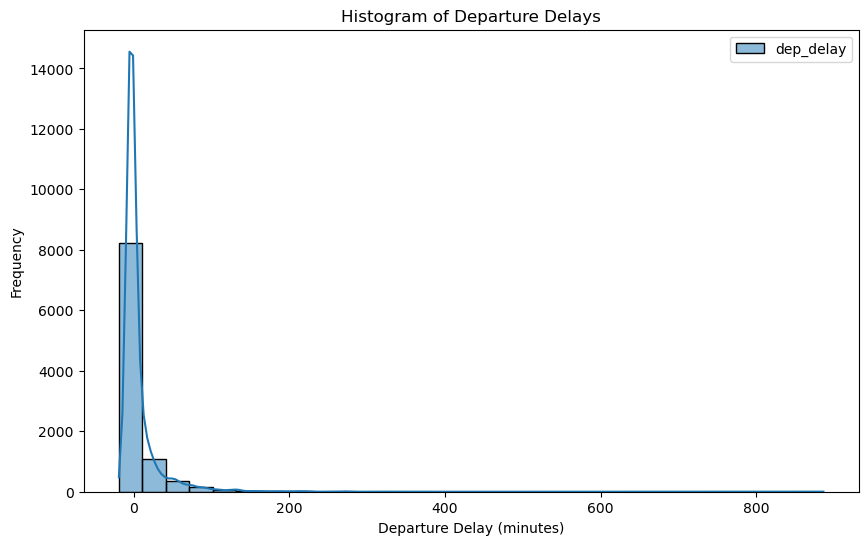

In [68]:
# Import necessary libraries
import pyspark.sql.functions as F
import matplotlib.pyplot as plt
import seaborn as sns

# Load data from CSV files into PySpark DataFrames
airports_df = spark.read.csv(r'C:\Users\suyog\Downloads\bigdata\airports.csv', header=True)
flights_df = spark.read.csv(r'C:\Users\suyog\Downloads\bigdata\flights_small.csv', header=True)
planes_df = spark.read.csv(r'C:\Users\suyog\Downloads\bigdata\planes.csv', header=True)

# Data Visualization Examples



# Example 2: Histogram of departure delays
flights_df = flights_df.withColumn("dep_delay", flights_df["dep_delay"].cast("int"))
plt.figure(figsize=(10, 6))
sns.histplot(flights_df.select("dep_delay").toPandas(), kde=True, bins=30)
plt.title("Histogram of Departure Delays")
plt.xlabel("Departure Delay (minutes)")
plt.ylabel("Frequency")
plt.show()




In [71]:
print(planes_df.columns)

['tailnum', 'year', 'type', 'manufacturer', 'model', 'engines', 'seats', 'speed', 'engine']


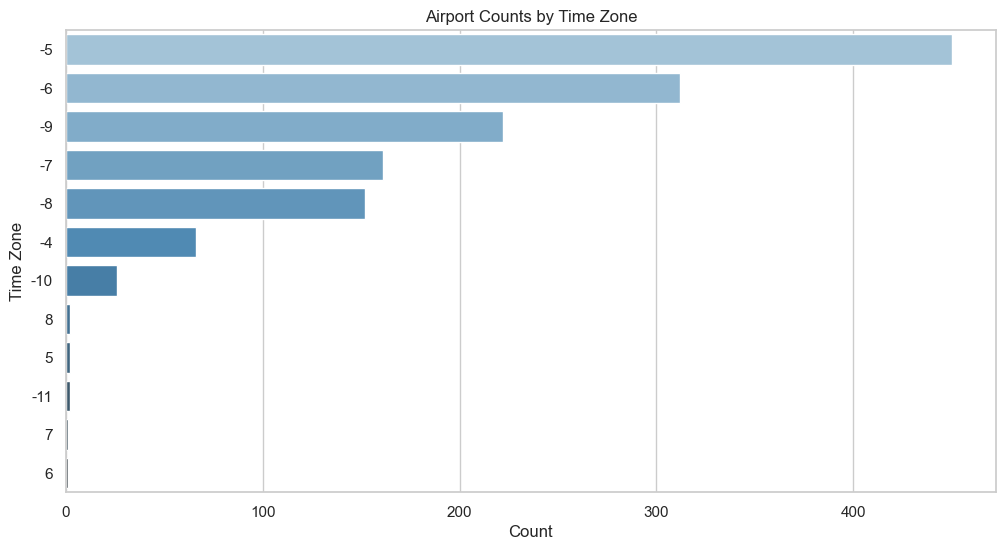

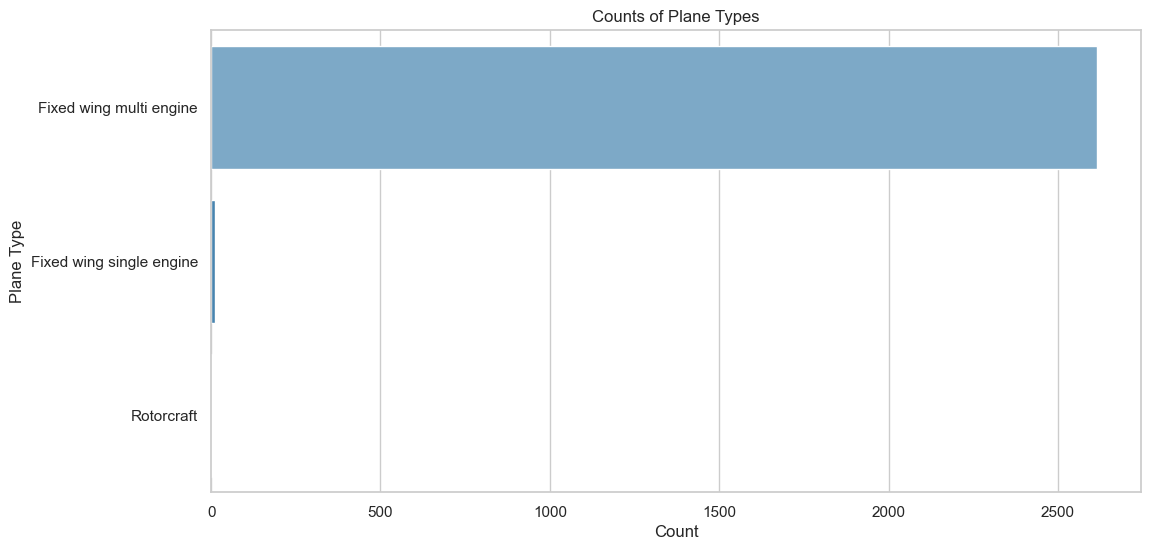

In [73]:
# Data Visualization Examples

# Example 1: Bar chart of airport counts by 'tz' (time zone)
airport_counts_by_tz = airports_df.groupBy("tz").count().orderBy("count", ascending=False)
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x="count", y="tz", data=airport_counts_by_tz.toPandas(), palette="Blues_d")
plt.title("Airport Counts by Time Zone")
plt.xlabel("Count")
plt.ylabel("Time Zone")
plt.show()




# Bar chart of plane types
plane_type_counts = planes_df.groupBy("type").count().orderBy("count", ascending=False)
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x="count", y="type", data=plane_type_counts.toPandas(), palette="Blues_d")
plt.title("Counts of Plane Types")
plt.xlabel("Count")
plt.ylabel("Plane Type")
plt.show()


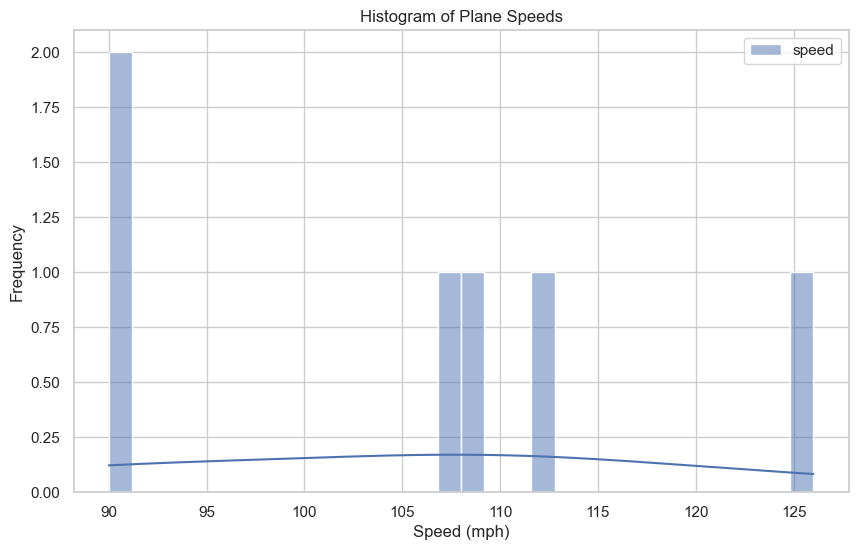

In [74]:
# Histogram of plane speeds
planes_df = planes_df.withColumn("speed", planes_df["speed"].cast("int"))
plt.figure(figsize=(10, 6))
sns.histplot(planes_df.select("speed").toPandas(), kde=True, bins=30)
plt.title("Histogram of Plane Speeds")
plt.xlabel("Speed (mph)")
plt.ylabel("Frequency")
plt.show()
